In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:12<00:00, 139MB/s]
100% 1.06G/1.06G [00:12<00:00, 93.0MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()



In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
 #generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label
  
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


In [ ]:
base_model=tf.keras.applications.MobileNetV2( 
    input_shape=(256,256,3),
    include_top=False,)

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
# create CNN model
model = tf.keras.Sequential([
                          base_model,
                          keras.layers.GlobalAveragePooling2D(),
                          keras.layers.Flatten(),
                          keras.layers.Dense(8,activation='relu'),
                          tf.keras.layers.Dense(1, activation="sigmoid")])
# model = Sequential()

# model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# model.add(Flatten())

# model.add(Dense(128,activation='relu'))
# model.add(Dropout(0.1))
# model.add(Dense(64,activation='relu'))
# model.add(Dropout(0.1))
# model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 8, 8, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 8)                 10248     
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,268,241
Trainable params: 2,234,129
Non-

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 151s 185ms/step - loss: 0.1281 - accuracy: 0.9491 - val_loss: 3.1900 - val_accuracy: 0.6174
Epoch 2/10
625/625 [==============================] - 114s 181ms/step - loss: 0.0772 - accuracy: 0.9700 - val_loss: 1.9777 - val_accuracy: 0.6848
Epoch 3/10
625/625 [==============================] - 115s 183ms/step - loss: 0.0724 - accuracy: 0.9743 - val_loss: 2.1097 - val_accuracy: 0.7418
Epoch 4/10
625/625 [==============================] - 115s 183ms/step - loss: 0.0652 - accuracy: 0.9747 - val_loss: 2.1577 - val_accuracy: 0.7876
Epoch 5/10
625/625 [==============================] - 115s 183ms/step - loss: 0.0529 - accuracy: 0.9800 - val_loss: 1.0334 - val_accuracy: 0.8626
Epoch 6/10
625/625 [==============================] - 115s 183ms/step - loss: 0.0517 - accuracy: 0.9806 - val_loss: 0.6657 - val_accuracy: 0.9024
Epoch 7/10
625/625 [==============================] - 115s 184ms/step - loss: 0.0473 - accuracy: 0.9818 - val_loss: 0.6456 -

In [ ]:
model.save("/content/drive/MyDrive/internship/mobilene.h5")

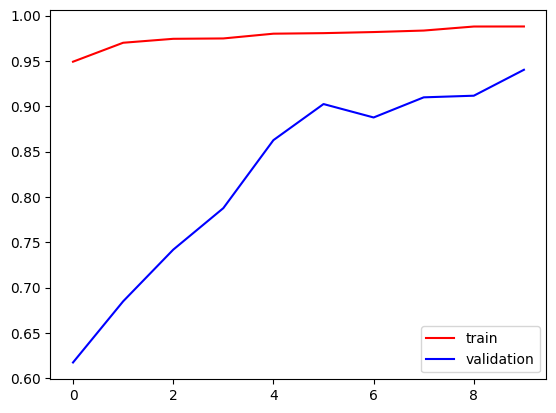

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

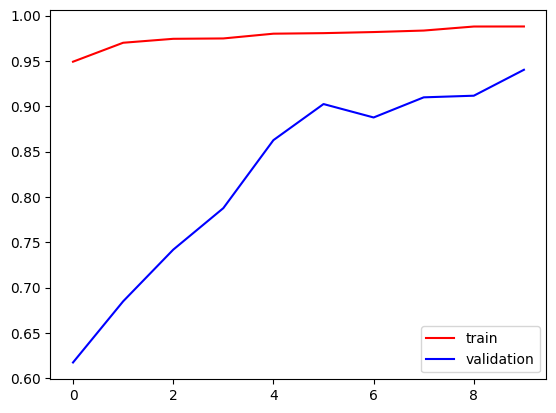

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

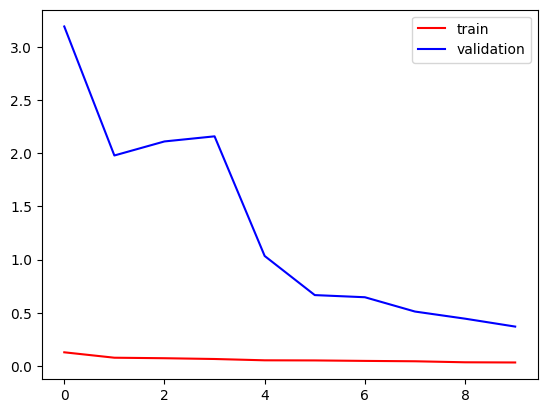

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

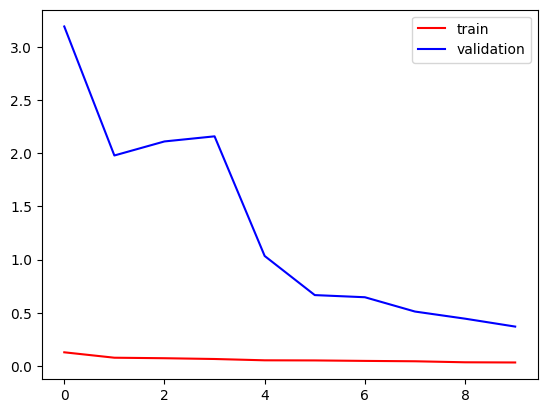

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
 
# load model
model = load_model('/content/drive/MyDrive/internship/mobilene.h5')
# summarize model.
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 8, 8, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 8)                 10248     
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,268,241
Trainable params: 2,234,129
Non-

In [11]:
import cv2
from matplotlib import pyplot as plt


In [12]:
test_img = plt.imread('/content/drive/MyDrive/test_images/cattt.jpg')


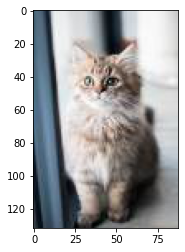

In [13]:
plt.imshow(test_img)


In [14]:
test_img.shape

(132, 88, 3)

In [15]:
test_img = cv2.resize(test_img,(256,256))

In [16]:
test_input = test_img.reshape((1,256,256,3))

In [17]:
from tensorflow.keras.models import load_model
 
# load model
model = load_model('/content/drive/MyDrive/internship/mobilene.h5')
# summarize model.
model.summary()

model.predict(test_input)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 8, 8, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 8)                 10248     
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,268,241
Trainable params: 2,234,129
Non-

array([[0.9999999]], dtype=float32)

In [2]:
import cv2
from matplotlib import pyplot as plt

In [5]:
test_img1 = plt.imread('/content/drive/MyDrive/test_images/dogg.jpg')


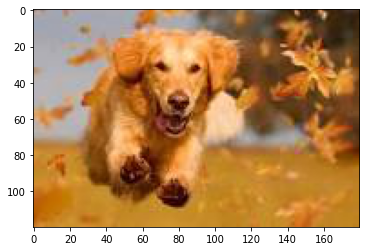

In [6]:
plt.imshow(test_img1)

In [7]:
test_img1.shape

(120, 180, 3)

In [8]:
test_img1 = cv2.resize(test_img1,(256,256))

In [9]:
test_input1 = test_img1.reshape((1,256,256,3))

In [10]:
from tensorflow.keras.models import load_model
 
# load model
model = load_model('/content/drive/MyDrive/internship/mobilene.h5')
# summarize model.
model.summary()

model.predict(test_input1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 8, 8, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 8)                 10248     
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,268,241
Trainable params: 2,234,129
Non-

array([[1.]], dtype=float32)